# Covid_19 Swiss Data Analysi

In [2]:
#Step
import math
from scipy import stats
import pandas as pd
from datetime import date, datetime
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.optimize import curve_fit
sns.set(style="ticks")
sns.set_context("talk")

print("Setup Complete")
data_swiss = pd.read_csv("https://raw.githubusercontent.com/daenuprobst/covid19-cases-switzerland/master/covid19_cases_switzerland.csv")

Setup Complete


In [3]:

#Load Data
path = ('/home/yangliu/Documents/covid-analysis/covid_swiss/COVID19_Fallzahlen_CH_total_v2.csv')
 
df_swiss = pd.read_csv(path, parse_dates=True)
df_swiss.shape
df_swiss=df_swiss.drop(['time','source'],axis=1)
df_swiss.head()
df_swiss=df_swiss.rename(columns={'abbreviation_canton_and_fl':'cantons'})
df_swiss.head()
data_swiss.head()

,Date,AG,AI,AR,BE,BL,BS,FR,GE,GL,...,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH,CH
0,2020-03-06,10.0,0.0,1.0,20.0,9.0,17.0,7.0,17.0,0.0,...,1.0,7.0,1.0,37.0,0.0,23.0,4.0,5.0,24.0,208
1,2020-03-07,14.0,0.0,1.0,25.0,13.0,22.0,7.0,26.0,0.0,...,1.0,7.0,1.0,43.0,0.0,30.0,5.0,6.0,28.0,263
2,2020-03-08,14.0,0.0,1.0,31.0,19.0,25.0,8.0,35.0,0.0,...,1.0,7.0,1.0,58.0,0.0,40.0,5.0,7.0,34.0,328
3,2020-03-09,14.0,0.0,2.0,34.0,20.0,29.0,10.0,44.0,0.0,...,1.0,7.0,2.0,67.0,0.0,51.0,7.0,7.0,36.0,376
4,2020-03-10,15.0,0.0,2.0,39.0,22.0,39.0,12.0,68.0,0.0,...,1.0,7.0,3.0,91.0,0.0,77.0,15.0,7.0,45.0,505


In [4]:
data_swiss.isnull().sum()

Date    0
AG      2
AI      4
AR      3
BE      4
BL      1
BS      2
FR      1
GE      1
GL      4
GR      4
JU      3
LU      3
NE      2
NW      1
OW      5
SG      2
SH      3
SO      5
SZ      3
TG      2
TI      1
UR      4
VD      2
VS      3
ZG      5
ZH      2
CH      0
dtype: int64

# Cleaning Data, check missing Values

In [5]:
df_swiss[df_swiss.isnull()]

,date,cantons,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

df_swiss.isnull().sum()

date                                      0
cantons                                   0
ncumul_tested                         14378
ncumul_conf                             287
new_hosp                              13684
current_hosp                           2473
current_icu                            4249
current_vent                          10035
ncumul_released                        9459
ncumul_deceased                         941
current_isolated                       8134
current_quarantined                    8231
current_quarantined_riskareatravel    10742
current_quarantined_total             14617
dtype: int64

In [16]:


#For missing ncumul_*,current_*, we fill NaN forward and with 0.
#col_ncumul=['ncumul_tested','ncumul_conf','ncumul_released','ncumul_deceased']
#df_swiss[col_ncumul]=df_swiss[col_ncumul].fillna(method='ffill').fillna(0)
#For missing  we fill NaN with 0
#col_current=['current_hosp','current_icu','current_vent','current_isolated','current_quarantined','current_quarantined_riskareatravel','current_quarantined_total']
#df_swiss[col_current]=df_swiss[col_current].fillna(method='ffill').fillna(0)
#For missing new_hosp, we fill NAN with 0
#df_swiss['new_hosp']=df_swiss['new_hosp'].fillna(0)
#df_swiss=df_swiss.fillna(0)
#df_swiss.head()
#df_swiss.tail()

,date,cantons,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
14612,2021-10-05,SZ,0.0,15556.0,0.0,0.0,0.0,0.0,14859.0,249.0,0.0,0.0,0.0,0.0
14613,2021-10-05,TG,0.0,25117.0,0.0,24.0,10.0,0.0,1426.0,486.0,0.0,0.0,0.0,0.0
14614,2021-10-05,BS,0.0,16186.0,0.0,16.0,6.0,0.0,15801.0,213.0,172.0,127.0,0.0,0.0
14615,2021-10-05,AI,0.0,1735.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,7.0,0.0,0.0
14616,2021-10-05,ZH,0.0,139938.0,0.0,99.0,46.0,32.0,0.0,1481.0,1516.0,6450.0,0.0,0.0


In [7]:
#Prepoccessing Data, we split the data to testing, hospital and quarantine
cantons=df_swiss.cantons.unique()
print(cantons)
col_cases=['date','cantons','ncumul_tested','ncumul_conf']
col_hos=['date','cantons','new_hosp','current_hosp','current_icu','current_vent','ncumul_released','ncumul_deceased']
col_qua=['date','cantons','current_quarantined','current_quarantined_riskareatravel','current_quarantined_total']
#swiss_canton=df_swiss.groupby('abbreviation_canton_and_fl')
df_cases=df_swiss[col_cases]
df_hos=df_swiss[col_hos]
df_qua=df_swiss[col_qua]
df_cases=df_cases.set_index('date')

['GE' 'BL' 'TI' 'GR' 'AG' 'BE' 'FL' 'JU' 'LU' 'ZH' 'BS' 'VD' 'VS' 'FR'
 'ZG' 'NE' 'SG' 'SZ' 'AR' 'TG' 'SO' 'GL' 'NW' 'SH' 'UR' 'OW' 'AI']


In [13]:
dates=df_cases.keys()
CH_caes=[]
for i in dates:
    confirmed_sum=df_cases[i].sum()
confirmed_sum 
dates   

Index(['cantons', 'ncumul_tested', 'ncumul_conf'], dtype='object')

# Daily Increase

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# Visualization

In [34]:
df_cases.head()
df_cases.dropna(how='all',inplace=True)
df_cases.fillna(0,inplace=True)
df_cases.head(50)

<ipython-input-34-e1de4e3ef388>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases.dropna(how='all',inplace=True)
/home/yangliu/venv/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,date,cantons,ncumul_tested,ncumul_conf
0,2020-01-01,GE,0.0,1.0
1,2020-01-02,GE,0.0,1.0
2,2020-01-03,GE,0.0,1.0
3,2020-01-04,GE,0.0,1.0
4,2020-01-05,GE,0.0,5.0
5,2020-01-06,GE,0.0,5.0
6,2020-01-07,GE,0.0,5.0
7,2020-01-08,GE,0.0,5.0
8,2020-01-09,GE,0.0,5.0
9,2020-01-10,GE,0.0,5.0


# Cantons Vistualization 

<ipython-input-41-c152c0540b29>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


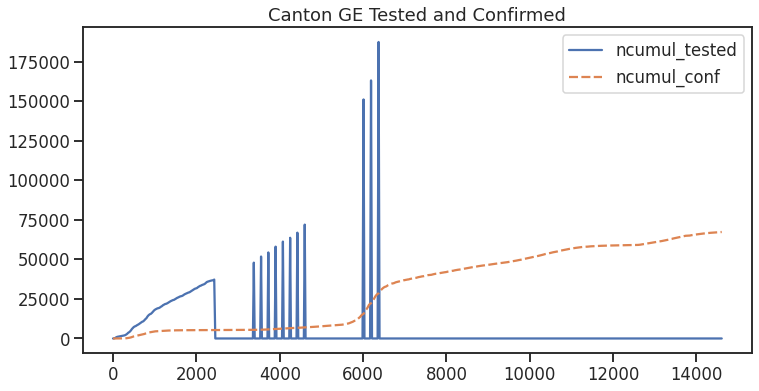

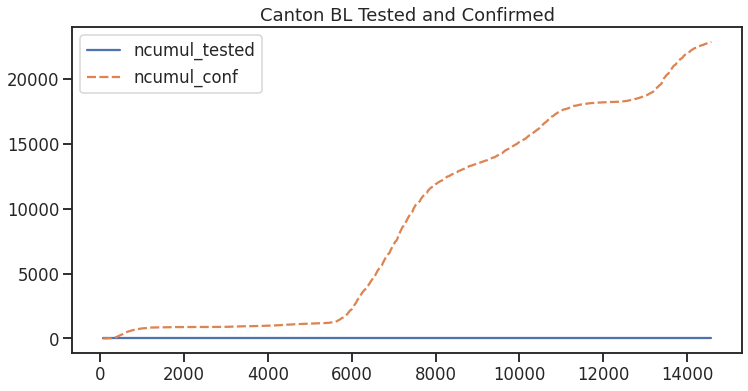

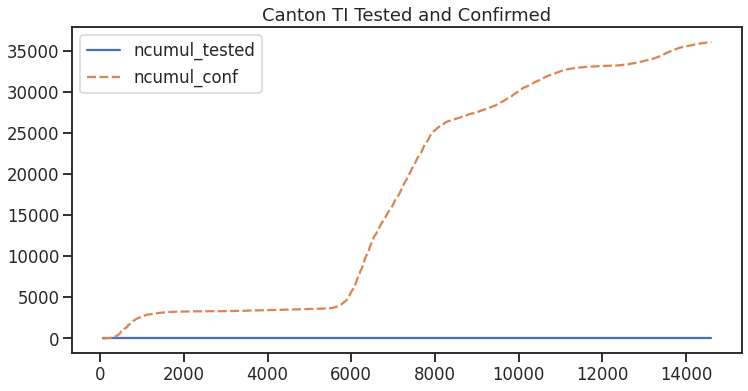

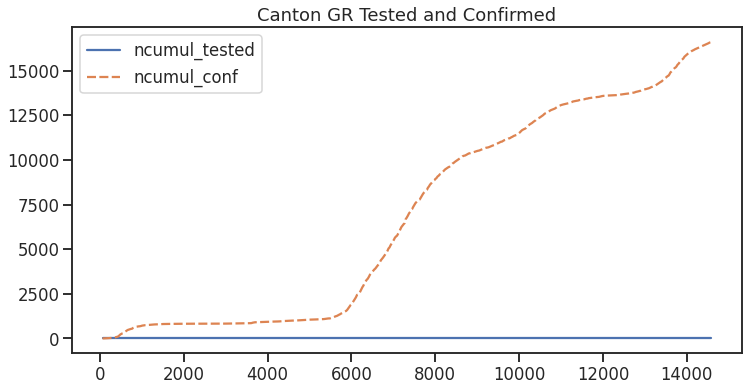

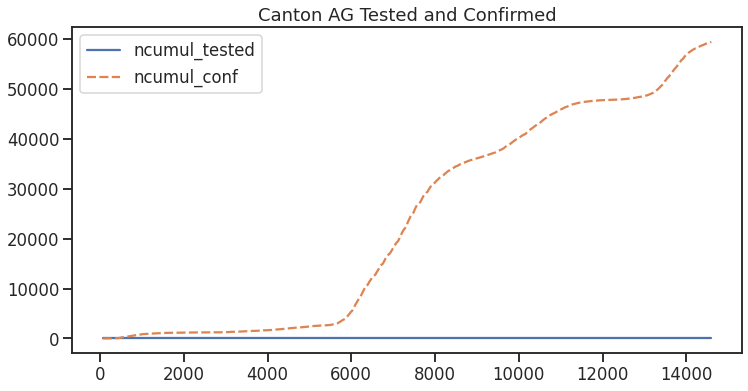

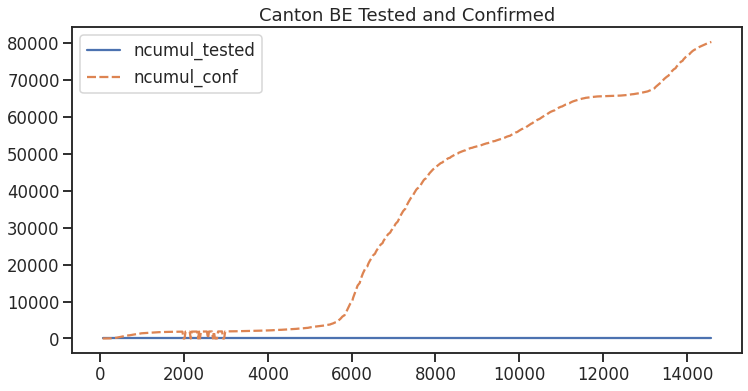

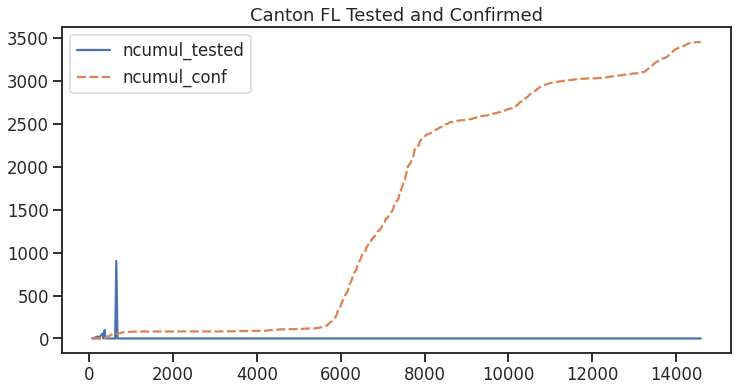

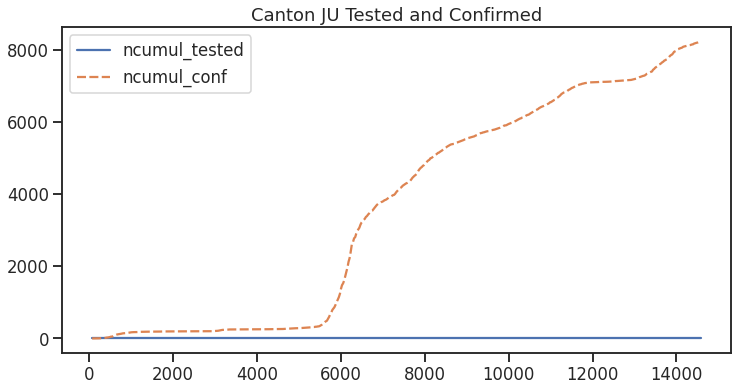

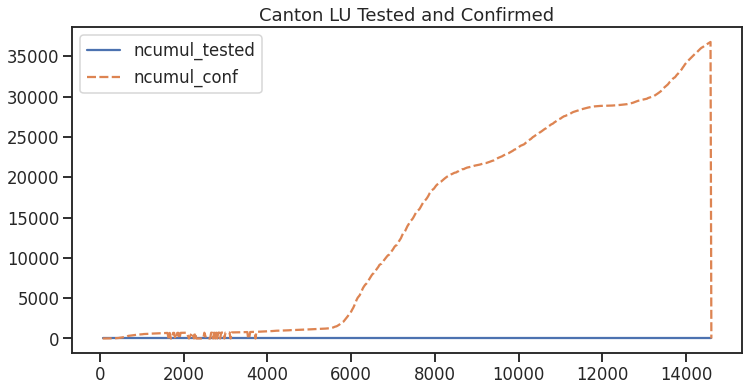

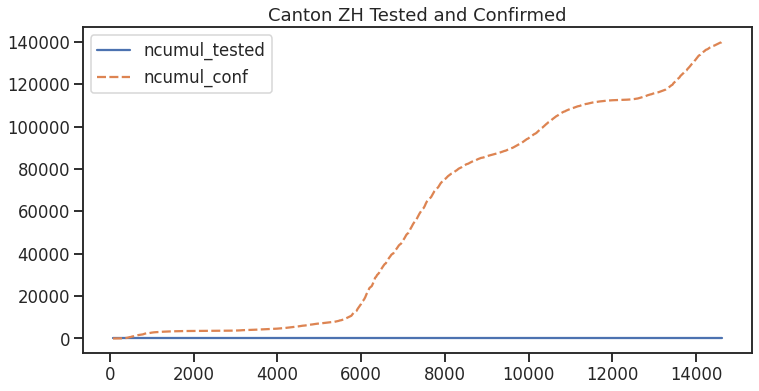

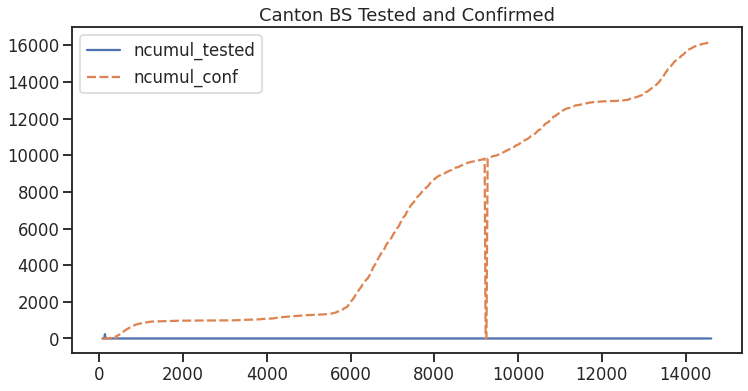

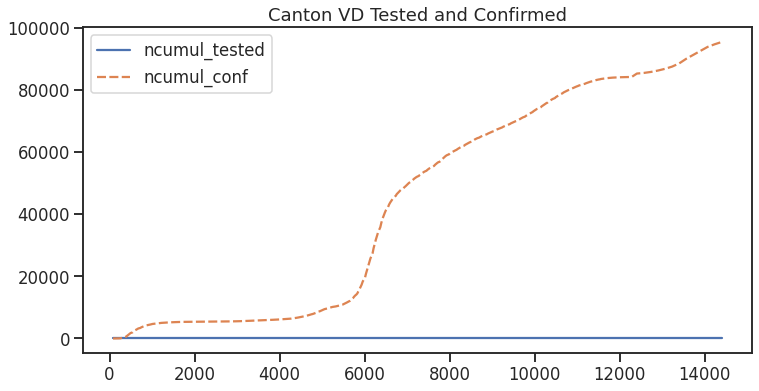

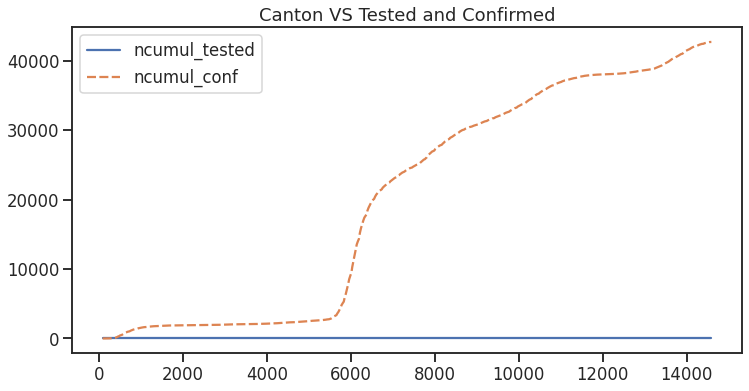

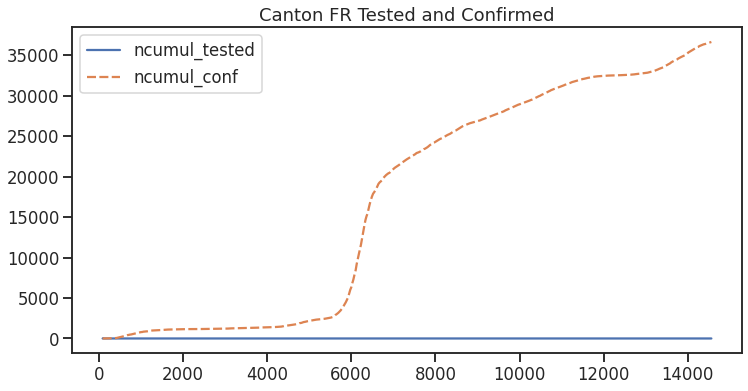

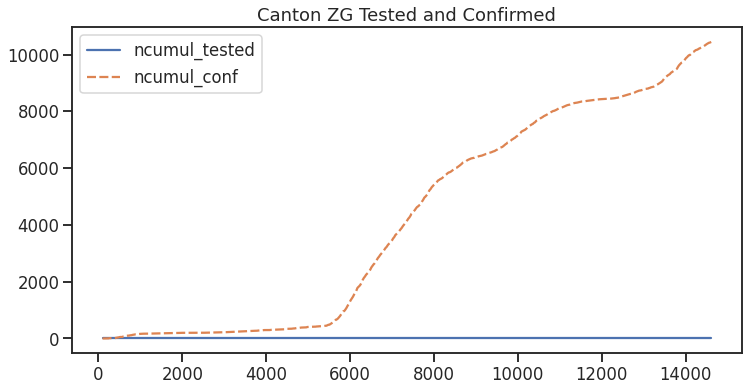

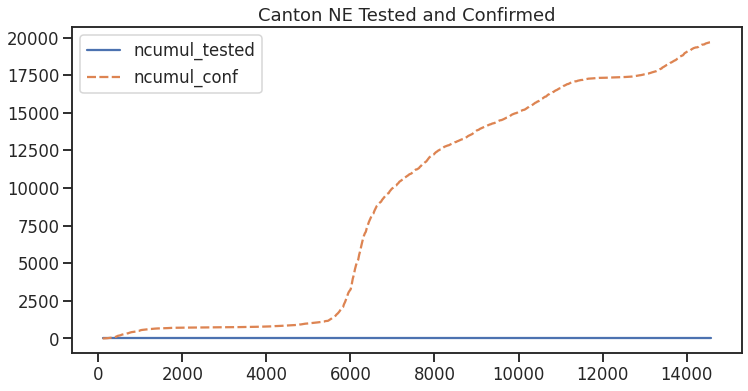

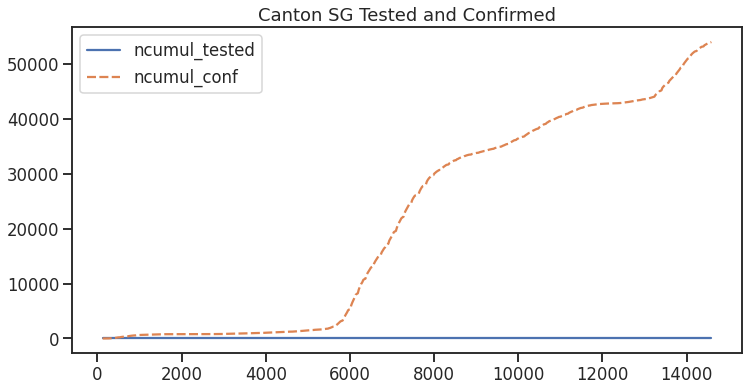

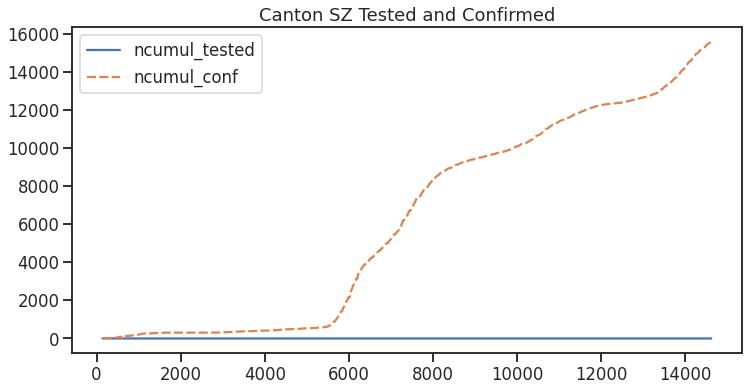

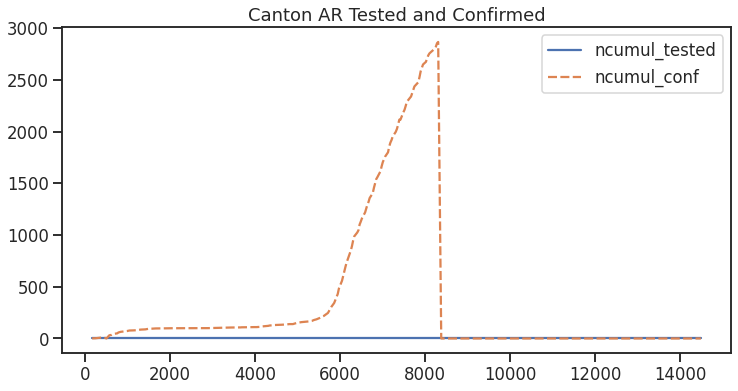

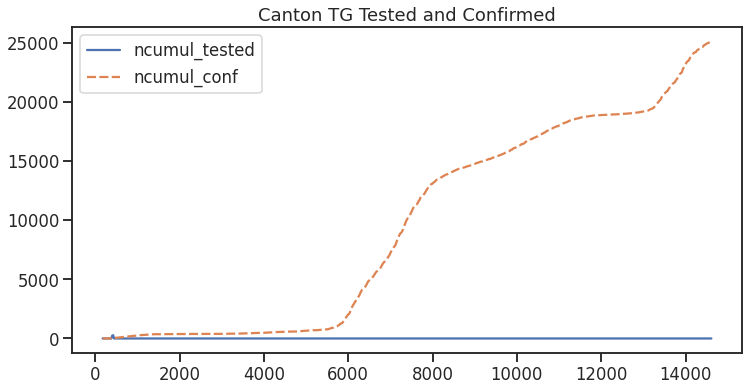

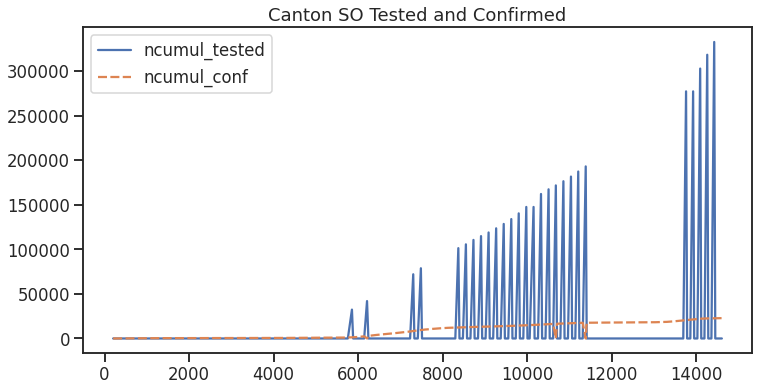

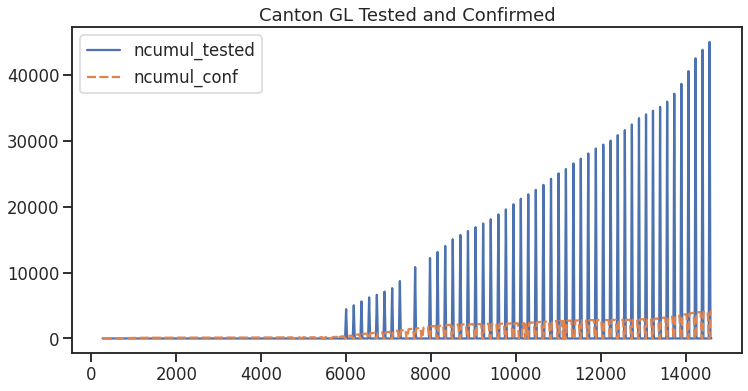

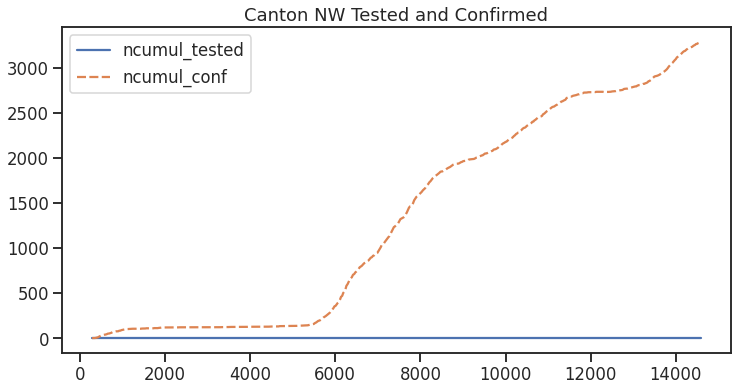

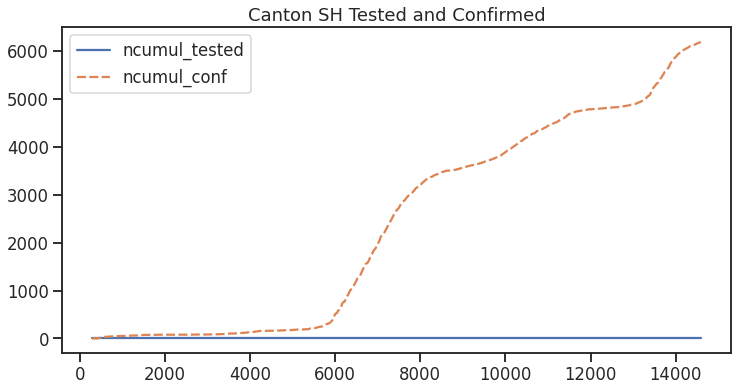

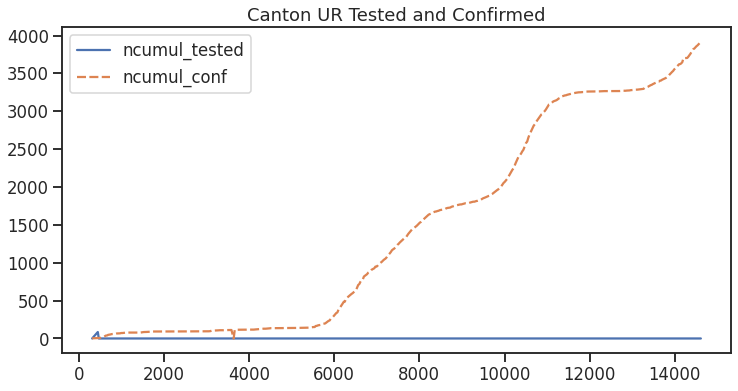

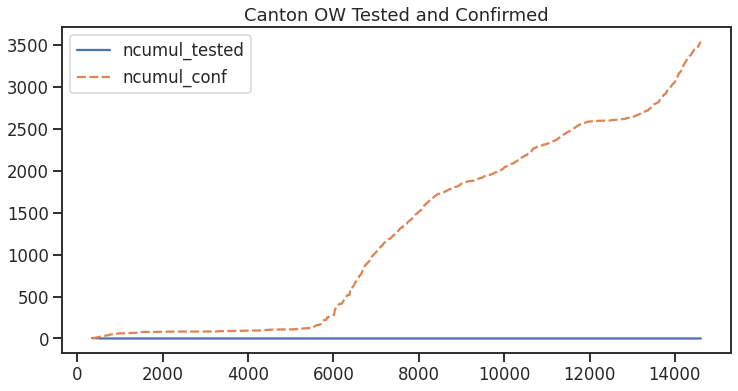

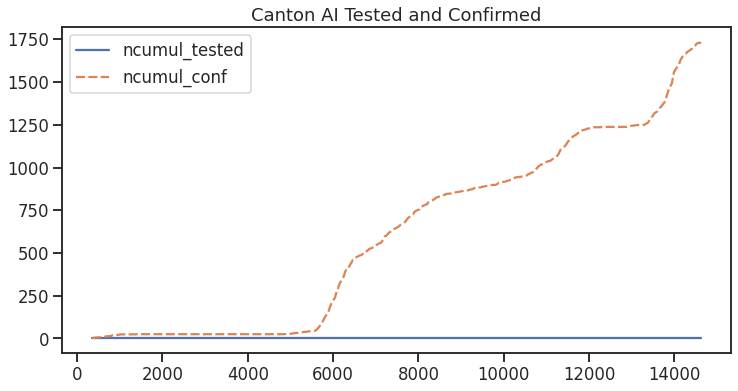

In [41]:
for canton in cantons:
    plt.figure(figsize=(12,6))
    plt.title("Canton {} Tested and Confirmed".format(canton))
    sns.lineplot(data=df_cases.loc[(df_cases.cantons == canton)])


#Vaud Case Study

<AxesSubplot:title={'center':'Vaud Tested and Confirmed'}>

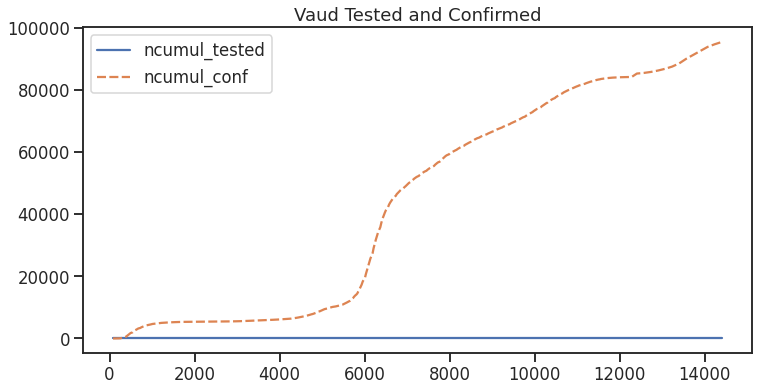

In [36]:
df_cases_vd=df_cases.loc[(df_cases.cantons == 'VD')]
plt.figure(figsize=(12,6))
plt.title('Vaud Tested and Confirmed')
sns.lineplot(data=df_cases_vd)


It shows that VD doesn't report any testing data

,date,cantons,ncumul_tested,ncumul_conf
12140,2021-06-23,VD,0.0,84281.0
12167,2021-06-24,VD,0.0,84293.0
12193,2021-06-25,VD,0.0,84299.0
12218,2021-06-26,VD,0.0,84301.0
12239,2021-06-27,VD,0.0,84306.0
12261,2021-06-28,VD,0.0,84322.0
12286,2021-06-29,VD,0.0,84327.0
12407,2021-07-04,VD,0.0,85419.0
12574,2021-07-11,VD,0.0,85625.0
12740,2021-07-18,VD,0.0,85948.0


In [267]:
#Visualization of Total Case
df_cases['CH']=
for canton in cantons:
    total = df_cases['date'].ncumul_tested

In [227]:
#Canton Testing
df_cases_cantons=df_cases.groupby(['cantons','date'])
df_cases_cantons.head()

,cantons,ncumul_tested,ncumul_conf
date,,,
2020-01-01,GE,0.0,1.0
2020-01-02,GE,0.0,1.0
2020-01-03,GE,0.0,1.0
2020-01-04,GE,0.0,1.0
2020-01-05,GE,0.0,5.0
...,...,...,...
2021-10-05,SZ,45004.0,15556.0
2021-10-05,TG,45004.0,25117.0
2021-10-05,BS,45004.0,16186.0


In [224]:
#Canton Confirmed
print(df_cases.groupby('cantons').ncumul_conf.agg([len, min, max]).sort_values(by='min', ascending=False))

         len  min       max
cantons                    
NW       573  4.0    3290.0
ZH       587  2.0  139938.0
AI       361  2.0    1735.0
UR       386  2.0    4296.0
GR       587  2.0   16605.0
VS       585  1.0   42712.0
VD       501  1.0   95606.0
TG       580  1.0   25117.0
SZ       565  1.0   15556.0
SO       405  1.0   39281.0
SH       573  1.0    6195.0
SG       582  1.0   54004.0
OW       475  1.0    3539.0
AG       587  1.0   59420.0
LU       572  1.0   36785.0
JU       586  1.0    8229.0
GL       544  1.0   36629.0
GE       644  1.0   67290.0
BS       587  1.0   16186.0
BE       583  1.0   80270.0
AR       300  1.0  138687.0
NE       583  1.0   19708.0
FR       583  0.0   36629.0
FL       584  0.0    3451.0
TI       530  0.0   36124.0
BL       589  0.0   22842.0
ZG       585  0.0   10443.0


<AxesSubplot:title={'center':'Vaud Tested and Confirmed'}, xlabel='date'>

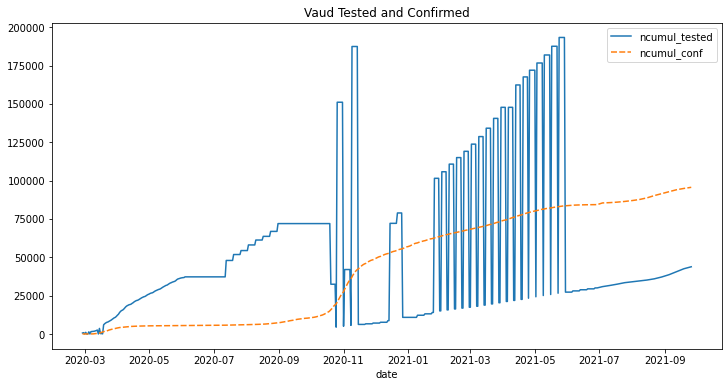

In [228]:
#Vaud Analysis
df_cases_vd=df_cases.loc[(df_cases.cantons == 'VD')]
plt.figure(figsize=(12,6))
plt.title('Vaud Tested and Confirmed')
sns.lineplot(data=df_cases_vd)